In [20]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#loading in the datset
food_balsheet = pd.read_csv("FoodBalanceSheets_E_Africa_NOFLAG.csv", encoding = "latin-1")

In [7]:
#displaying the information about the dataset
food_balsheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60943 entries, 0 to 60942
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     60943 non-null  int64  
 1   Area          60943 non-null  object 
 2   Item Code     60943 non-null  int64  
 3   Item          60943 non-null  object 
 4   Element Code  60943 non-null  int64  
 5   Element       60943 non-null  object 
 6   Unit          60943 non-null  object 
 7   Y2014         59354 non-null  float64
 8   Y2015         59395 non-null  float64
 9   Y2016         59408 non-null  float64
 10  Y2017         59437 non-null  float64
 11  Y2018         59507 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 5.6+ MB


In [8]:
#displaing the number of null rows
food_balsheet.isna().sum()

Area Code          0
Area               0
Item Code          0
Item               0
Element Code       0
Element            0
Unit               0
Y2014           1589
Y2015           1548
Y2016           1535
Y2017           1506
Y2018           1436
dtype: int64

In [9]:
#displaying the number of rows an columns of the dataset
food_balsheet.shape

(60943, 12)

In [10]:
#displaying the summary statistics of the dataset
food_balsheet.describe(include = "all")

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
count,60943.000000,60943,60943.000000,60943,60943.000000,60943,60943,59354.000000,59395.000000,59408.000000,59437.000000,59507.000000
unique,NaN,49,NaN,119,NaN,18,5,NaN,NaN,NaN,NaN,NaN
top,NaN,Kenya,NaN,Milk - Excluding Butter,NaN,Domestic supply quantity,1000 tonnes,NaN,NaN,NaN,NaN,NaN
freq,NaN,1560,NaN,1262,NaN,5295,40933,NaN,NaN,NaN,NaN,NaN
mean,134.265576,NaN,2687.176706,NaN,3814.856456,NaN,NaN,134.196282,135.235966,136.555222,140.917765,143.758381
std,72.605709,NaN,146.055739,NaN,2212.007033,NaN,NaN,1567.663696,1603.403984,1640.007194,1671.862359,1710.782658
min,4.000000,NaN,2501.000000,NaN,511.000000,NaN,NaN,-1796.000000,-3161.000000,-3225.000000,-1582.000000,-3396.000000
25%,74.000000,NaN,2562.000000,NaN,684.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
50%,136.000000,NaN,2630.000000,NaN,5142.000000,NaN,NaN,0.090000,0.080000,0.080000,0.100000,0.070000
75%,195.000000,NaN,2775.000000,NaN,5511.000000,NaN,NaN,8.340000,8.460000,8.430000,9.000000,9.000000


In [11]:
#displaying the first five row of the dataset
food_balsheet.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


In [14]:
#Total number of unique countries
food_balsheet["Area"].nunique()

49

In [26]:
#Total sum of wine produced in the year 2015
food_balsheet.groupby("Item")["Y2015"].sum()

Item
Alcohol, Non-Food        2180.00
Alcoholic Beverages     98783.72
Animal Products         11811.73
Animal fats            200675.72
Apples and products     10559.15
                         ...    
Vegetables, Other      158104.08
Vegetal Products       107064.17
Wheat and products     234710.51
Wine                     4251.81
Yams                   203151.78
Name: Y2015, Length: 119, dtype: float64

In [27]:
#Total sum of wine produced in the year 2018
food_balsheet.groupby("Item")["Y2018"].sum()

Item
Alcohol, Non-Food        2293.00
Alcoholic Beverages     97847.27
Animal Products         11578.61
Animal fats            269648.27
Apples and products      9640.51
                         ...    
Vegetables, Other      163987.21
Vegetal Products       107775.39
Wheat and products     242645.19
Wine                     4039.32
Yams                   221272.09
Name: Y2018, Length: 119, dtype: float64

In [18]:
#The area with the 7th lowest sum in 2017
area_sum = food_balsheet.groupby("Area")["Y2017"].sum()
area_sum.sort_values(ascending = True).head(7)

Area
Sudan (former)               0.00
Ethiopia PDR                 0.00
Comoros                     59.84
Seychelles                 442.34
Sao Tome and Principe    12662.63
Cabo Verde               14650.74
Guinea-Bissau            19102.77
Name: Y2017, dtype: float64

In [19]:
#Total sum of Processing in the year 2017
food_balsheet.groupby("Element")["Y2017"].sum()

Element
Domestic supply quantity                  2088198.10
Export Quantity                            182338.80
Fat supply quantity (g/capita/day)          10253.84
Feed                                       223705.68
Food                                      1258888.28
Food supply (kcal/capita/day)              454681.00
Food supply quantity (kg/capita/yr)         48690.04
Import Quantity                            294559.09
Losses                                     160614.00
Other uses (non-food)                       91645.97
Processing                                 292836.00
Production                                2030056.89
Protein supply quantity (g/capita/day)      11842.45
Residuals                                   35500.00
Seed                                        24870.14
Stock Variation                             54316.91
Total Population - Both sexes             1112641.00
Tourist consumption                            91.00
Name: Y2017, dtype: float64

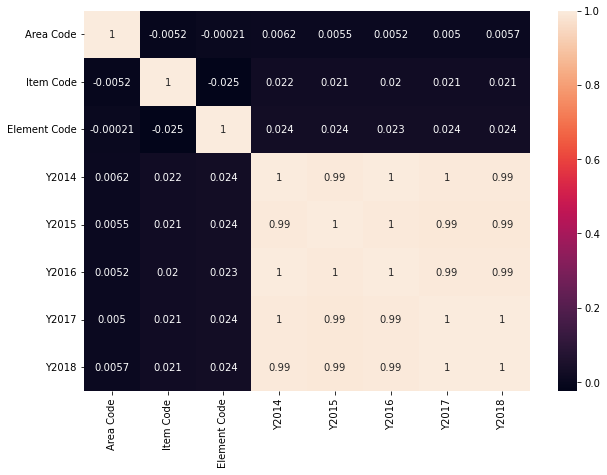

In [68]:
#Year with the least correlation with Element code
plt.figure(figsize = (10,7))
corr = food_balsheet.corr()
sns.heatmap(corr, annot = True);

In [32]:
food_balsheet.iloc[:]

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28
...,...,...,...,...,...,...,...,...,...,...,...,...
60938,181,Zimbabwe,2899,Miscellaneous,5142,Food,1000 tonnes,42.00,46.00,33.00,19.00,16.00
60939,181,Zimbabwe,2899,Miscellaneous,645,Food supply quantity (kg/capita/yr),kg,3.06,3.33,2.35,1.33,1.08
60940,181,Zimbabwe,2899,Miscellaneous,664,Food supply (kcal/capita/day),kcal/capita/day,3.00,4.00,3.00,1.00,1.00
60941,181,Zimbabwe,2899,Miscellaneous,674,Protein supply quantity (g/capita/day),g/capita/day,0.10,0.11,0.08,0.04,0.04


In [35]:
#Area with the highest sum in 2017
food_balsheet.groupby("Area")["Y2017"].sum().sort_values(ascending = False).head()

Area
Nigeria         1483268.23
Egypt            866379.92
South Africa     517590.54
Ethiopia         448683.76
Morocco          388495.36
Name: Y2017, dtype: float64

In [66]:
a = food_balsheet.groupby("Element")["Y2014"].sum()
b = food_balsheet.groupby("Element")["Y2015"].sum()
c = food_balsheet.groupby("Element")["Y2016"].sum()
d = food_balsheet.groupby("Element")["Y2017"].sum()
e = food_balsheet.groupby("Element")["Y2018"].sum()

In [72]:
print(a)

Element
Domestic supply quantity                  1996716.35
Export Quantity                            150020.64
Fat supply quantity (g/capita/day)          10225.56
Feed                                       216927.89
Food                                      1212332.49
Food supply (kcal/capita/day)              454257.00
Food supply quantity (kg/capita/yr)         49650.63
Import Quantity                            274144.48
Losses                                     153223.00
Other uses (non-food)                       78718.13
Processing                                 282923.00
Production                                1931287.75
Protein supply quantity (g/capita/day)      11836.46
Residuals                                   30149.00
Seed                                        21922.92
Stock Variation                             58749.83
Total Population - Both sexes             1031585.00
Tourist consumption                           416.00
Name: Y2014, dtype: float64


In [73]:
print(b)

Element
Domestic supply quantity                  2021493.55
Export Quantity                            157614.47
Fat supply quantity (g/capita/day)          10235.74
Feed                                       225050.22
Food                                      1232361.10
Food supply (kcal/capita/day)              453383.00
Food supply quantity (kg/capita/yr)         49345.13
Import Quantity                            267018.46
Losses                                     155439.00
Other uses (non-food)                       66254.41
Processing                                 287929.00
Production                                1947019.39
Protein supply quantity (g/capita/day)      11833.95
Residuals                                   30045.00
Seed                                        23976.82
Stock Variation                             34910.99
Total Population - Both sexes             1058081.00
Tourist consumption                           349.00
Name: Y2015, dtype: float64


In [74]:
print(c)

Element
Domestic supply quantity                  2044842.70
Export Quantity                            151920.46
Fat supply quantity (g/capita/day)          10102.77
Feed                                       228958.65
Food                                      1247022.17
Food supply (kcal/capita/day)              451810.00
Food supply quantity (kg/capita/yr)         48985.28
Import Quantity                            286582.78
Losses                                     157787.00
Other uses (non-food)                       69563.68
Processing                                 280631.00
Production                                1943537.15
Protein supply quantity (g/capita/day)      11779.69
Residuals                                   37224.00
Seed                                        23389.20
Stock Variation                             33140.12
Total Population - Both sexes             1085107.00
Tourist consumption                            89.00
Name: Y2016, dtype: float64


In [76]:
print(d)

Element
Domestic supply quantity                  2088198.10
Export Quantity                            182338.80
Fat supply quantity (g/capita/day)          10253.84
Feed                                       223705.68
Food                                      1258888.28
Food supply (kcal/capita/day)              454681.00
Food supply quantity (kg/capita/yr)         48690.04
Import Quantity                            294559.09
Losses                                     160614.00
Other uses (non-food)                       91645.97
Processing                                 292836.00
Production                                2030056.89
Protein supply quantity (g/capita/day)      11842.45
Residuals                                   35500.00
Seed                                        24870.14
Stock Variation                             54316.91
Total Population - Both sexes             1112641.00
Tourist consumption                            91.00
Name: Y2017, dtype: float64
